In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = '~/PycharmProjects/Data-Management-and-Database-Design/Assignment_1/scraper/raw_data/allstar_roaster.csv'
allstar_roaster = pd.read_csv(file_path)
print(allstar_roaster.head(5))

   Unnamed: 0      FULL_NAME   STATUS POSITION    MIN  FGM-A FG3M-A FTM-A  \
0           0            NaN      NaN      NaN    NaN    NaN    NaN   NaN   
1           1  Anthony Davis  Starter        C  16:40    6-9    0-1   0-0   
2           2   Kevin Durant  Starter       PF  29:57   7-13    3-8   2-2   
3           3   Kyrie Irving  Starter       PG  27:36   6-16    1-5   0-0   
4           4   LeBron James  Starter       SF  31:17  12-17    4-8   1-1   

    FIC  OREB  DREB   REB  AST   PF  STL  TOV  BLK   PTS    YEAR  
0   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN     NaN  
1   6.0   1.0   1.0   2.0  1.0  2.0  0.0  1.0  0.0  12.0  2018.0  
2  18.8   1.0   5.0   6.0  5.0  3.0  3.0  2.0  1.0  19.0  2018.0  
3  14.8   2.0   5.0   7.0  9.0  2.0  1.0  1.0  0.0  13.0  2018.0  
4  26.4   0.0  10.0  10.0  8.0  2.0  1.0  5.0  0.0  29.0  2018.0  


In [3]:
allstar_roaster.rename(columns = {allstar_roaster.columns[0]:'RECORD_ID'}, inplace=True)
print(allstar_roaster.columns)

Index(['RECORD_ID', 'FULL_NAME', 'STATUS', 'POSITION', 'MIN', 'FGM-A',
       'FG3M-A', 'FTM-A', 'FIC', 'OREB', 'DREB', 'REB', 'AST', 'PF', 'STL',
       'TOV', 'BLK', 'PTS', 'YEAR'],
      dtype='object')


In [4]:

allstar_roaster.count()

RECORD_ID    1549
FULL_NAME    1548
STATUS       1548
POSITION     1548
MIN          1548
FGM-A        1548
FG3M-A       1548
FTM-A        1548
FIC          1548
OREB         1548
DREB         1548
REB          1548
AST          1548
PF           1548
STL          1548
TOV          1548
BLK          1548
PTS          1548
YEAR         1548
dtype: int64

In [5]:
allstar_roaster.apply(lambda x: sum(x.isnull()),axis=0)

RECORD_ID    0
FULL_NAME    1
STATUS       1
POSITION     1
MIN          1
FGM-A        1
FG3M-A       1
FTM-A        1
FIC          1
OREB         1
DREB         1
REB          1
AST          1
PF           1
STL          1
TOV          1
BLK          1
PTS          1
YEAR         1
dtype: int64

In [6]:

print(allstar_roaster[allstar_roaster.isnull().any(axis=1)])

   RECORD_ID FULL_NAME STATUS POSITION  MIN FGM-A FG3M-A FTM-A  FIC  OREB  \
0          0       NaN    NaN      NaN  NaN   NaN    NaN   NaN  NaN   NaN   

   DREB  REB  AST  PF  STL  TOV  BLK  PTS  YEAR  
0   NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN   NaN  


In [7]:
allstar_roaster = allstar_roaster.drop(index=0)
print(allstar_roaster.head(5))

   RECORD_ID          FULL_NAME   STATUS POSITION    MIN  FGM-A FG3M-A FTM-A  \
1          1      Anthony Davis  Starter        C  16:40    6-9    0-1   0-0   
2          2       Kevin Durant  Starter       PF  29:57   7-13    3-8   2-2   
3          3       Kyrie Irving  Starter       PG  27:36   6-16    1-5   0-0   
4          4       LeBron James  Starter       SF  31:17  12-17    4-8   1-1   
5          5  Russell Westbrook  Starter       SG  28:28   4-11    1-6   2-3   

    FIC  OREB  DREB   REB  AST   PF  STL  TOV  BLK   PTS    YEAR  
1   6.0   1.0   1.0   2.0  1.0  2.0  0.0  1.0  0.0  12.0  2018.0  
2  18.8   1.0   5.0   6.0  5.0  3.0  3.0  2.0  1.0  19.0  2018.0  
3  14.8   2.0   5.0   7.0  9.0  2.0  1.0  1.0  0.0  13.0  2018.0  
4  26.4   0.0  10.0  10.0  8.0  2.0  1.0  5.0  0.0  29.0  2018.0  
5  13.4   3.0   5.0   8.0  8.0  2.0  0.0  2.0  0.0  11.0  2018.0  


In [8]:
# Sort and edit th GAME_ID

allstar_roaster = allstar_roaster.sort_values(by = ['YEAR','RECORD_ID'] , ascending = True)

allstar_roaster = allstar_roaster.reset_index(drop=True)

for i in range (0,allstar_roaster.shape[0]): 
    allstar_roaster.iat[i,0] = i+1
    
print(allstar_roaster.head())

   RECORD_ID      FULL_NAME   STATUS POSITION    MIN FGM-A FG3M-A FTM-A   FIC  \
0          1  Frankie Brian  Starter       SG  00:00  5-14    0-0   4-5   8.1   
1          2    Paul Arizin  Starter       PG  00:00  7-12    0-0   1-2   9.5   
2          3     Bob Davies  Starter       PG  00:00   4-6    0-0   5-5  13.9   
3          4   Vince Boryla  Starter       SF  00:00   4-6    0-0   1-1   6.1   
4          5     Alex Groza  Starter       PF  00:00  8-16    0-0   1-1  13.4   

   OREB  DREB   REB  AST   PF  STL  TOV  BLK   PTS    YEAR  
0   0.0   6.0   6.0  3.0  2.0  0.0  0.0  0.0  14.0  1951.0  
1   0.0   7.0   7.0  0.0  2.0  0.0  0.0  0.0  15.0  1951.0  
2   0.0   5.0   5.0  5.0  3.0  0.0  0.0  0.0  13.0  1951.0  
3   0.0   2.0   2.0  2.0  3.0  0.0  0.0  0.0   9.0  1951.0  
4   0.0  13.0  13.0  1.0  4.0  0.0  0.0  0.0  17.0  1951.0  


In [9]:
allstar_roaster.apply(lambda x: sum(x.isnull()),axis=0)

RECORD_ID    0
FULL_NAME    0
STATUS       0
POSITION     0
MIN          0
FGM-A        0
FG3M-A       0
FTM-A        0
FIC          0
OREB         0
DREB         0
REB          0
AST          0
PF           0
STL          0
TOV          0
BLK          0
PTS          0
YEAR         0
dtype: int64

In [10]:

allstar_roaster.dtypes

RECORD_ID      int64
FULL_NAME     object
STATUS        object
POSITION      object
MIN           object
FGM-A         object
FG3M-A        object
FTM-A         object
FIC          float64
OREB         float64
DREB         float64
REB          float64
AST          float64
PF           float64
STL          float64
TOV          float64
BLK          float64
PTS          float64
YEAR         float64
dtype: object

In [11]:
allstar_roaster.OREB = allstar_roaster.OREB.astype(dtype='int64')
allstar_roaster.DREB = allstar_roaster.DREB.astype(dtype='int64')
allstar_roaster.REB = allstar_roaster.REB.astype(dtype='int64')
allstar_roaster.AST = allstar_roaster.AST.astype(dtype='int64')
allstar_roaster.PF = allstar_roaster.PF.astype(dtype='int64')
allstar_roaster.STL = allstar_roaster.STL.astype(dtype='int64')
allstar_roaster.TOV = allstar_roaster.TOV.astype(dtype='int64')
allstar_roaster.BLK = allstar_roaster.BLK.astype(dtype='int64')
allstar_roaster.PTS = allstar_roaster.PTS.astype(dtype='int64')
allstar_roaster.YEAR = allstar_roaster.YEAR.astype(dtype='int64')

In [12]:
print(allstar_roaster.describe().round(2))

       RECORD_ID      FIC     OREB     DREB      REB      AST       PF  \
count    1548.00  1548.00  1548.00  1548.00  1548.00  1548.00  1548.00   
mean      774.50     8.73     1.04     3.85     4.88     2.66     1.79   
std       447.01     6.61     1.50     3.56     3.85     2.81     1.48   
min         1.00    -8.00     0.00     0.00     0.00     0.00     0.00   
25%       387.75     4.00     0.00     1.00     2.00     1.00     1.00   
50%       774.50     7.80     0.00     3.00     4.00     2.00     2.00   
75%      1161.25    12.40     2.00     5.00     7.00     4.00     3.00   
max      1548.00    35.80    10.00    27.00    27.00    22.00     6.00   

           STL      TOV      BLK      PTS     YEAR  
count  1548.00  1548.00  1548.00  1548.00  1548.00  
mean      0.76     1.03     0.29    11.02  1985.21  
std       1.17     1.49     0.70     7.41    19.37  
min       0.00     0.00     0.00     0.00  1951.00  
25%       0.00     0.00     0.00     6.00  1969.00  
50%       0.00 

In [13]:
print(allstar_roaster.describe(include=[np.object]))

                  FULL_NAME STATUS POSITION    MIN FGM-A FG3M-A FTM-A
count                  1548   1548     1548   1548  1548   1548  1548
unique                  411      2        5    211   185     58    73
top     Kareem Abdul-Jabbar  Bench       PF  22:00   2-4    0-0   0-0
freq                     18    879      317     81    41   1076   585


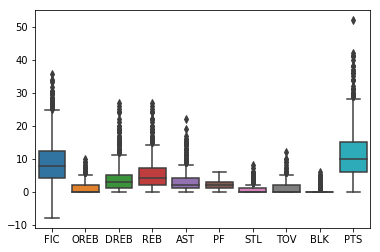

In [14]:
plot_data = allstar_roaster[allstar_roaster.columns[1:(allstar_roaster.shape[1]-1)]]
sns.boxplot(data=plot_data)

FIC (Floor Impact Counter): A formula to encompass all aspects of the box score into a single statistic. The intent of the statistic is similar to other efficiency stats, but assists, shot creation and offensive rebounding are given greater importance. Created by Chris Reina in 2007. 
Formula: (Points + ORB. + 0.75 DRB + AST + STL + BLK –0.75 FGA – 0.375 FTA – TO – 0.5 PF)


In [15]:
print(allstar_roaster.loc[allstar_roaster['PTS'] > 50])

      RECORD_ID      FULL_NAME   STATUS POSITION    MIN  FGM-A FG3M-A FTM-A  \
1504       1505  Anthony Davis  Starter        C  31:50  26-39    0-4   0-0   

       FIC  OREB  DREB  REB  AST  PF  STL  TOV  BLK  PTS  YEAR  
1504  31.8     4     6   10    0   1    2    1    0   52  2017  


OREB
DREB
REB
AST
PF
STL
TOV
BLK
PTS


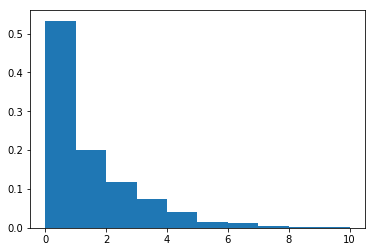

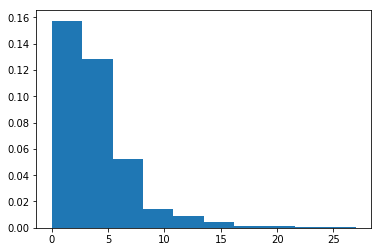

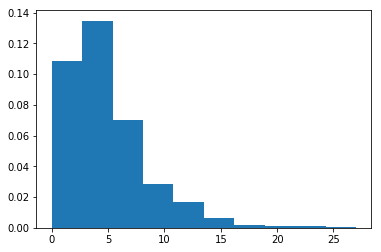

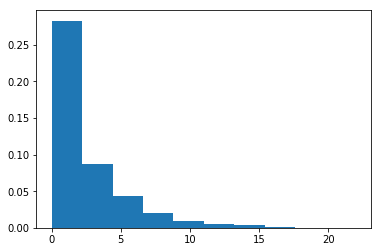

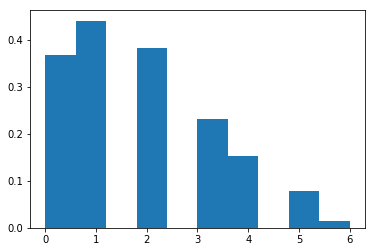

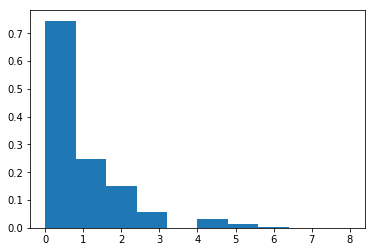

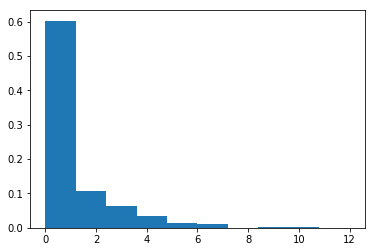

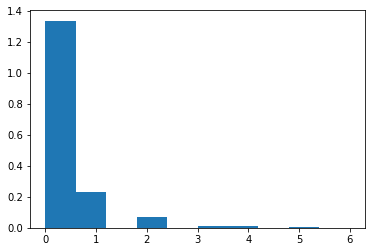

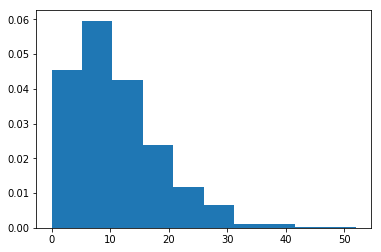

<Figure size 432x288 with 0 Axes>

In [56]:
for i in range (1,(allstar_roaster.shape[1]-1)):
    #j = 0
    if allstar_roaster[allstar_roaster.columns[i]].dtype == 'int64' :
       p = plt.hist(allstar_roaster[allstar_roaster.columns[i]], density=True)
       plt.figure(i)
       print(allstar_roaster.columns[i])

In [57]:
# Load the data
file_path = '~/PycharmProjects/Data-Management-and-Database-Design/Assignment_1/scraper/raw_data/allstar_games.csv'
allstar_games = pd.read_csv(file_path)
print(allstar_games.head(5))

   Unnamed: 0        DATE WINNING_TEAM  WINNING_SCORE   LOSING_TEAM  \
0           1  02/18/2018  Team LeBron            148  Team Stephen   
1           2  02/19/2017         West            192          East   
2           3  02/14/2016         West            196          East   
3           4  02/15/2015         West            163          East   
4           5  02/16/2014         East            163          West   

   LOSING_SCORE                                  VENUE                MVP  
0           145        Staples Center, Los Angeles, CA       LeBron James  
1           182  Smoothie King Center, New Orleans, LA      Anthony Davis  
2           173             Air Canada Centre, Toronto  Russell Westbrook  
3           158   Madison Square Garden, Manhattan, NY  Russell Westbrook  
4           155  Smoothie King Center, New Orleans, LA       Kyrie Irving  


In [37]:
for i in range (0,allstar_roaster.shape[0]):
    for allstar_roaster.columns['YEAR'] ==  pd.DatetimeIndex(allstar_games['DATE']).year

'DREB'